<a href="https://colab.research.google.com/github/Angelgz011/estadistica2/blob/main/ei_u3_04_%3C22150429%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='COST',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2023-01-01',        # Fecha de inicio
    end='2025-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,COST_Open,COST_High,COST_Low,COST_Close,COST_Adj Close,COST_Volume
Date,,,,,,
2023-01-03,458.000000,458.799988,447.899994,453.279999,436.265381,1978100
2023-01-04,457.179993,459.510010,452.589996,456.559998,439.422211,2097300
2023-01-05,454.540009,456.429993,449.619995,450.190002,433.291351,2169300
2023-01-06,463.079987,484.420013,462.220001,482.869995,464.744598,5174500
2023-01-09,482.929993,486.869995,478.140015,478.750000,460.779297,2384800
...,...,...,...,...,...,...
2024-12-24,950.739990,959.380005,945.450012,958.820007,956.515503,939000
2024-12-26,956.820007,959.409973,954.000000,956.140015,953.841980,969000
2024-12-27,948.719971,950.450012,932.000000,939.700012,937.441467,1943400


# Parte (a) Selección y visualización de la serie de Tiempo.

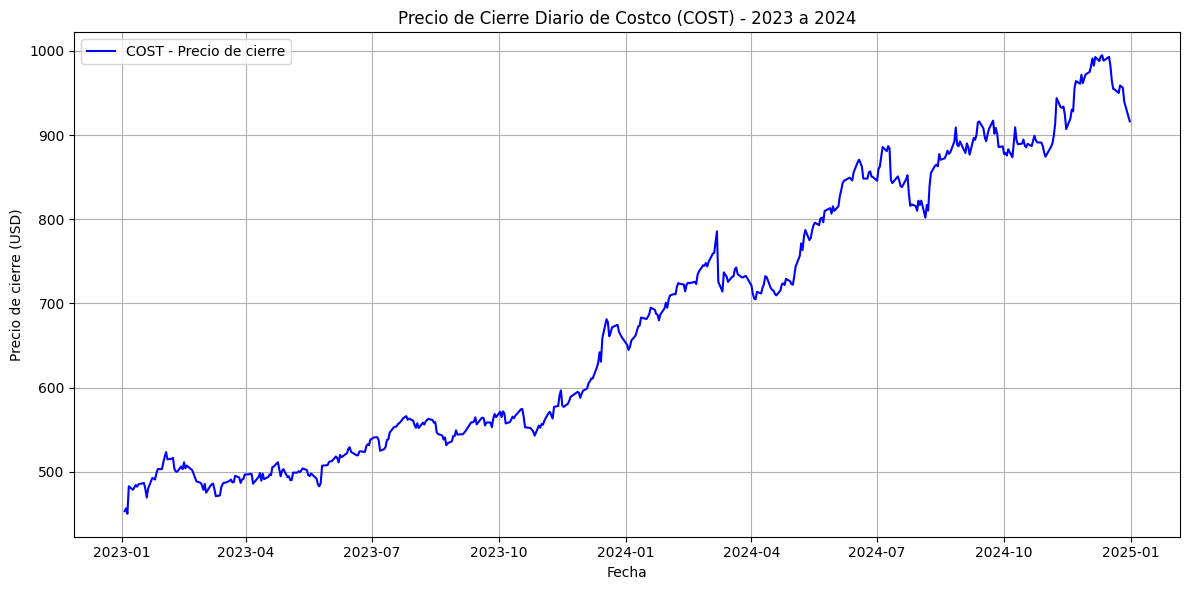

In [2]:
import matplotlib.pyplot as plt

# Parte (a) - Graficar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['COST_Close'], label='COST - Precio de cierre', color='blue')


plt.title('Precio de Cierre Diario de Costco (COST) - 2023 a 2024')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Parte (b) Prueba de Estacionariedad

In [3]:
from statsmodels.tsa.stattools import adfuller, kpss

# Parte (b) - Pruebas de estacionariedad

# Serie de precios de cierre
serie = df['COST_Close']

# Prueba ADF
adf_result = adfuller(serie)
print('--- Prueba Dickey-Fuller Aumentada (ADF) ---')
print(f'Estadístico ADF: {adf_result[0]:.4f}')
print(f'Valor-p: {adf_result[1]:.4f}')
print(f'Número de rezagos: {adf_result[2]}')
print(f'Número de observaciones: {adf_result[3]}')
print('Valores críticos:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')
print('¿Rechazamos H0 (serie NO estacionaria)?', 'Sí' if adf_result[1] < 0.05 else 'No')

# Prueba KPSS
kpss_result = kpss(serie, regression='c', nlags='auto')
print('\n--- Prueba KPSS ---')
print(f'Estadístico KPSS: {kpss_result[0]:.4f}')
print(f'Valor-p: {kpss_result[1]:.4f}')
print(f'Número de rezagos: {kpss_result[2]}')
print('Valores críticos:')
for key, value in kpss_result[3].items():
    print(f'   {key}: {value:.4f}')
print('¿Rechazamos H0 (serie estacionaria)?', 'Sí' if kpss_result[1] < 0.05 else 'No')


--- Prueba Dickey-Fuller Aumentada (ADF) ---
Estadístico ADF: -0.5081
Valor-p: 0.8904
Número de rezagos: 0
Número de observaciones: 501
Valores críticos:
   1%: -3.4435
   5%: -2.8673
   10%: -2.5699
¿Rechazamos H0 (serie NO estacionaria)? No

--- Prueba KPSS ---
Estadístico KPSS: 3.5932
Valor-p: 0.0100
Número de rezagos: 13
Valores críticos:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
¿Rechazamos H0 (serie estacionaria)? Sí


<ipython-input-3-ea9ab9db2f32>:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(serie, regression='c', nlags='auto')


# Parte (c) Regresión Polinomial y Estacionariedad de los Residuales


=== Grado 1 ===


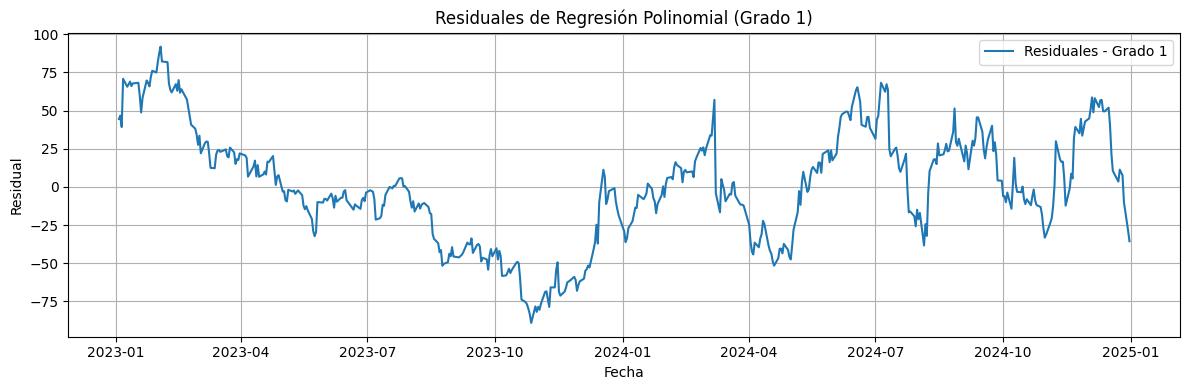

Estadístico ADF: -2.6047
Valor-p: 0.0920
¿Rechazamos H0 (NO estacionario)? No
Gráfico ACF para los residuales del modelo grado 1


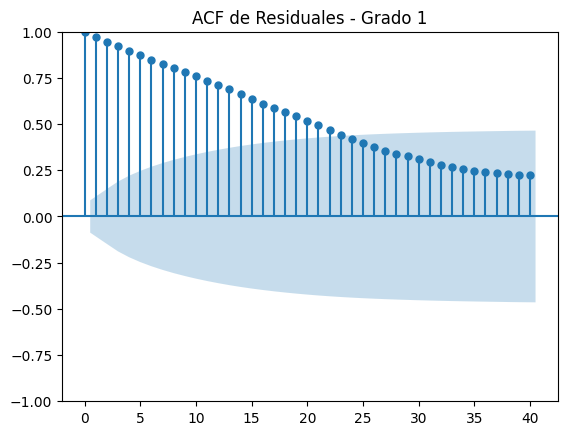


=== Grado 2 ===


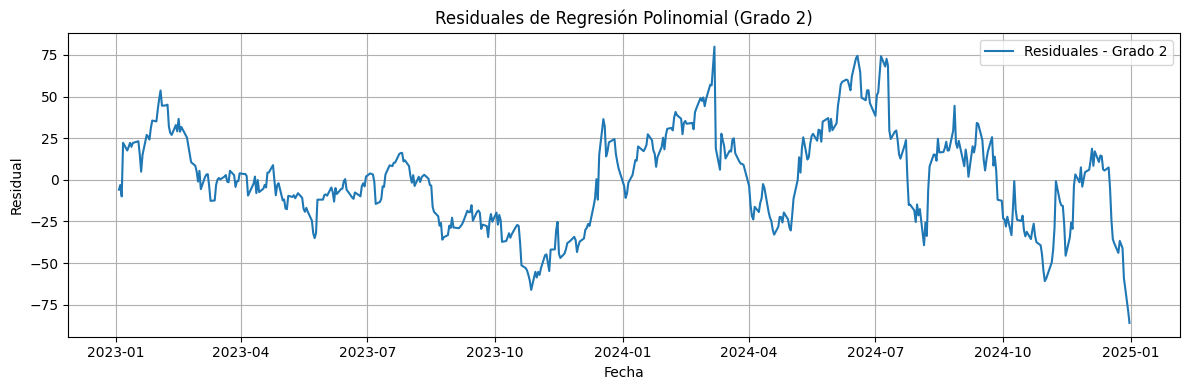

Estadístico ADF: -2.5808
Valor-p: 0.0970
¿Rechazamos H0 (NO estacionario)? No
Gráfico ACF para los residuales del modelo grado 2


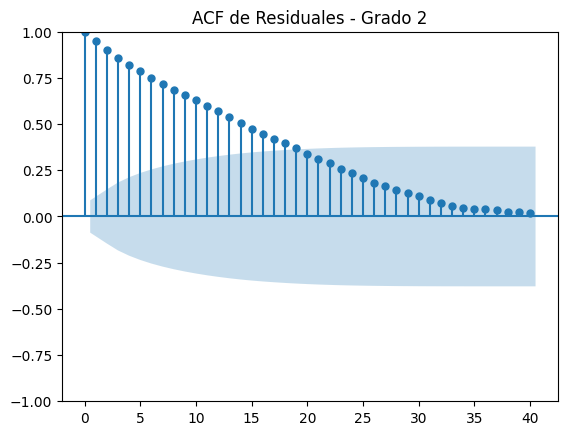


=== Grado 3 ===


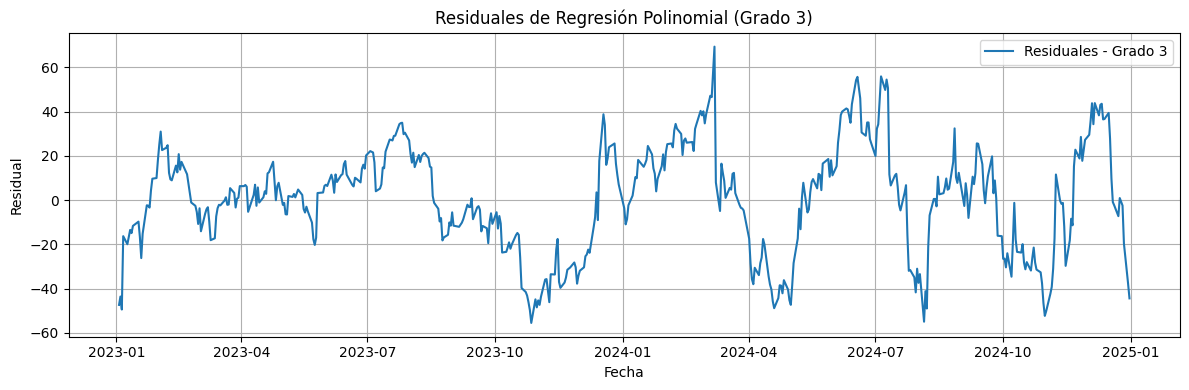

Estadístico ADF: -3.9684
Valor-p: 0.0016
¿Rechazamos H0 (NO estacionario)? Sí
Gráfico ACF para los residuales del modelo grado 3


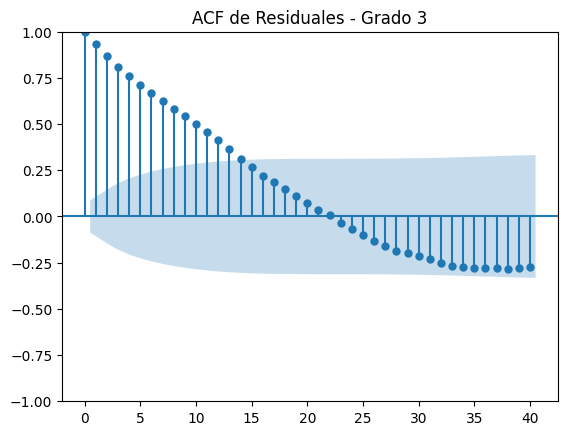

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Tomamos los datos de cierre y lo convertimos en numpy
y = df['COST_Close'].values
X = np.arange(len(y)).reshape(-1, 1)  # Variable de tiempo

# Probar grados polinomiales del 1 al 3
for grado in range(1, 4):
    print(f'\n=== Grado {grado} ===')

    # Transformación polinomial
    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(X)

    # Ajustar regresión lineal sobre X transformado
    modelo = LinearRegression()
    modelo.fit(X_poly, y)

    # Predicción y cálculo de residuales
    y_pred = modelo.predict(X_poly)
    residuales = y - y_pred

    # Graficar residuales
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, residuales, label=f'Residuales - Grado {grado}')
    plt.title(f'Residuales de Regresión Polinomial (Grado {grado})')
    plt.xlabel('Fecha')
    plt.ylabel('Residual')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Prueba ADF sobre los residuales
    adf_test = adfuller(residuales)
    print(f'Estadístico ADF: {adf_test[0]:.4f}')
    print(f'Valor-p: {adf_test[1]:.4f}')
    print(f'¿Rechazamos H0 (NO estacionario)?', 'Sí' if adf_test[1] < 0.05 else 'No')

    # Gráfico ACF de los residuales
    print(f'Gráfico ACF para los residuales del modelo grado {grado}')
    plot_acf(residuales, lags=40)
    plt.title(f'ACF de Residuales - Grado {grado}')
    plt.show()


# Conclusión

Se obtienen los precios diarios de cierre de Costco desde enero de 3034 hasta enero de 2025.

En la serie de tiempo hay una tendencia claramente ascendente, con algunas caídas leves.

La prueba de Dickey-Fuller muestra que la serie no es estacionaria, al igual que la prueba KPSS que coincide con que se rechaza la estacionariedad

Al realizar las pruebas de regresion polinomial y estacionariedad de los residuales nos encontramos con que el grado 1 no logró mostrar residuales estacionarios, y  mostraban una correlación que no pudo ser eliminada.

Aunque en el grado 2 el resultado fué algo mejor, aún no se logró conseguir la estacionarieda. En el 2do grado la dependencia en el gráfico ACF se disipaba más rápido pero aún había patrones que no se podían explicar.


Mientras tanto en el grado 3 ya se mostró un valor-p menor a -0.05 y el grafico de regresión polinomial mostraba una ocilación al rededor de 0 más constante. Esto nos indica una estacionaridad, Además el gráfico ACF muestra que al inicio hay una fuerte correlación pero que baja rapidamente hasta que baja a -25 y se estabiliza dentro del rango de confianza. Confirmando la estacionariedad y que el modelo de grado 3 sí captura la estructura de la tendencia.